# Data Wrangling: Join, Combine, 

In [85]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
# 要 将 全局的图像 默认大小设置为 10 * 6
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

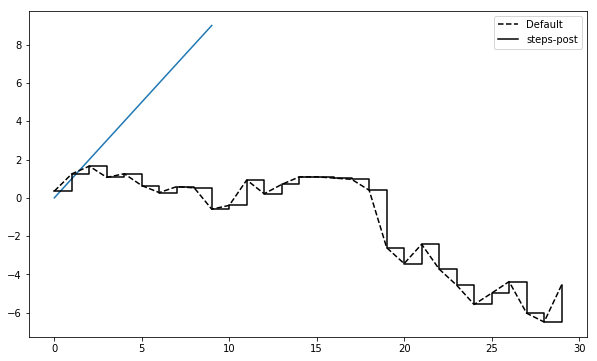

In [40]:
# 线型图中， 非实际数据点  默认是按 线性方式  插值的，可以通过 drawstyle 选项修改
plt.plot((np.arange(10)))

data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

(-2.45, 51.45)

(0, 100)

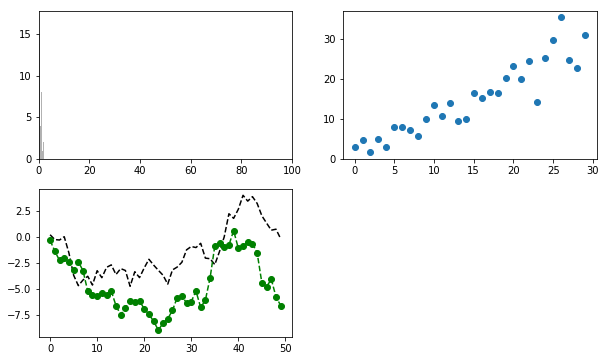

In [45]:
# matplotlib 的图像 都 位于 Figure对象中，可以使用 plt.figure创建一个Figure对象
#（Figure对象还支持一种 MATLAB式的编号架构，例如 plt.figure(2)）,通过 plt.gcf() 即可 得到当前 Figure对象的引用
fig = plt.figure()  # 会弹出一个空窗口
# 不能 通过 空Figure绘图，必须用 add_subplot创建一个或者多个subplot才行
# 代码含义：图像 应该是 2*2的，且当前选中的是4 个subplot中的第一个（编号从1开始）
ax1 = fig.add_subplot(2, 2, 1)  #  返回 matplotlib.axes._subplots.AxesSubplot对象
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#  绘图指令 在 最后一个 用过 的 subplot(如果没有则创建一个) 上进行绘制
# plt.plot([1.5, 3.5, -2, 1.6])
plt.plot(np.random.randn(50).cumsum(), 'k--')  # k-- ； 线型选项，绘制黑色 虚线图
# 在其他格子里画图
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))
#ax3.plot(np.random.randn(30).cumsum(), 'ko--') 
ax3.plot(np.random.randn(50).cumsum(), color='g', linestyle='dashed', marker='o')

# plt.xlim-控制图表的范围（limits）；plt.xticks-控制刻度范围（tick mark）;plt.xticklabels-刻度标签
# 其中，调用时不带参数，返回当前的 设置值；调用时带参数 则 设置参数值
# 当前或 最近创建的 AxesSubplot起作用
plt.xlim()   # 返回 当前 的 X轴 绘图 范围
ax1.set_xlim([0,100])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc213265dd8>,
      dtype=object)

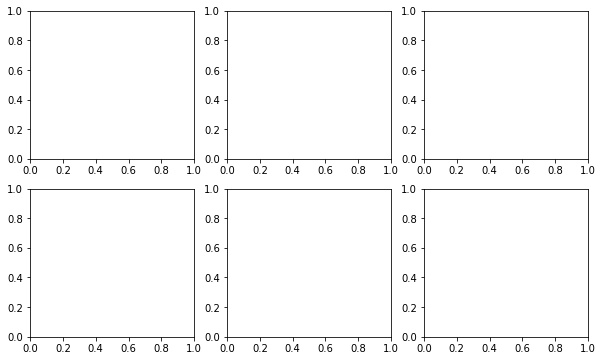

In [28]:
# plt.subplots：可以创建 一个新的 Figure，并返回 一个含有 已创建的 subplot对象的NumPy数组
fig, axes = plt.subplots(2,3)
# 类似 一个 二维数组一样，可以轻松对axes数组进行索引，
# 可以通过 sharex 和 sharey指定 subplot应该具有相同的X轴或Y轴（比较相同范围的数据时，非常实用—因为matplotlib会自动缩放各个图表的界限）
axes

### 调整subplot周围的间距

默认情况下，matplotlib会在subplot外围留下一定的边距，并在 subplot之间留下一定的间距（间距跟图像的高度和宽度有关）。利用 Figure的```subplots_adjust```方法可以轻而易举的修改间距，此外，它还是一个顶级函数。

```subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)```

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  4.,  1.,  1.,  5.,  1.,  6.,  6.,
         5.,  4.,  9.,  5., 10., 10., 11., 20., 22., 17., 20., 29., 24.,
        23., 28., 27., 27., 33., 24., 28., 16., 15., 15., 11., 10.,  3.,
         7.,  3.,  6.,  1.,  3.,  4.,  0.,  1.,  1.,  1.,  1.]),
 array([-3.4816, -3.3515, -3.2214, -3.0913, -2.9612, -2.8311, -2.701 ,
        -2.5708, -2.4407, -2.3106, -2.1805, -2.0504, -1.9203, -1.7902,
        -1.6601, -1.53  , -1.3999, -1.2698, -1.1397, -1.0096, -0.8795,
        -0.7494, -0.6193, -0.4891, -0.359 , -0.2289, -0.0988,  0.0313,
         0.1614,  0.2915,  0.4216,  0.5517,  0.6818,  0.8119,  0.942 ,
         1.0721,  1.2022,  1.3323,  1.4624,  1.5926,  1.7227,  1.8528,
         1.9829,  2.113 ,  2.2431,  2.3732,  2.5033,  2.6334,  2.7635,
         2.8936,  3.0237]),
 <a list of 50 Patch objects>)

(array([ 1.,  1.,  6.,  1.,  3.,  3.,  3.,  4.,  9.,  9.,  4.,  4., 12.,
         8., 18.,  9., 14., 18., 23., 21., 17., 22., 24., 23., 21., 15.,
        13., 21., 22., 22., 18., 15., 14.,  9., 16., 12., 10.,  6.,  4.,
         7.,  5.,  3.,  4.,  1.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([-2.7316, -2.6197, -2.5079, -2.3961, -2.2843, -2.1725, -2.0607,
        -1.9489, -1.8371, -1.7252, -1.6134, -1.5016, -1.3898, -1.278 ,
        -1.1662, -1.0544, -0.9426, -0.8307, -0.7189, -0.6071, -0.4953,
        -0.3835, -0.2717, -0.1599, -0.0481,  0.0637,  0.1756,  0.2874,
         0.3992,  0.511 ,  0.6228,  0.7346,  0.8464,  0.9582,  1.0701,
         1.1819,  1.2937,  1.4055,  1.5173,  1.6291,  1.7409,  1.8527,
         1.9646,  2.0764,  2.1882,  2.3   ,  2.4118,  2.5236,  2.6354,
         2.7472,  2.8591]),
 <a list of 50 Patch objects>)

(array([ 1.,  3.,  2.,  1.,  1.,  1.,  2.,  4.,  6.,  5.,  7.,  4.,  4.,
        16., 16., 14., 16., 22., 20., 25., 22., 17., 20., 23., 16., 29.,
        19., 23., 25., 24., 14., 20., 15., 16., 10.,  7.,  9.,  9.,  0.,
         4.,  3.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([-2.94  , -2.8174, -2.6948, -2.5722, -2.4496, -2.327 , -2.2044,
        -2.0818, -1.9592, -1.8366, -1.714 , -1.5914, -1.4688, -1.3462,
        -1.2236, -1.101 , -0.9784, -0.8558, -0.7332, -0.6106, -0.488 ,
        -0.3654, -0.2428, -0.1202,  0.0024,  0.125 ,  0.2476,  0.3702,
         0.4928,  0.6154,  0.738 ,  0.8606,  0.9832,  1.1058,  1.2284,
         1.351 ,  1.4736,  1.5962,  1.7188,  1.8414,  1.964 ,  2.0866,
         2.2092,  2.3318,  2.4544,  2.5769,  2.6995,  2.8221,  2.9447,
         3.0673,  3.1899]),
 <a list of 50 Patch objects>)

(array([ 3.,  0.,  1.,  1.,  3.,  2.,  4.,  1.,  3.,  5.,  5.,  7.,  8.,
         3.,  8., 12., 19., 13., 12., 17., 13., 15., 19., 23., 22., 19.,
        21., 21., 16., 20., 19., 17., 15., 15., 18., 11., 18.,  6.,  9.,
        14., 11.,  7.,  8.,  5.,  1.,  3.,  3.,  1.,  1.,  2.]),
 array([-3.0446, -2.9312, -2.8179, -2.7045, -2.5911, -2.4778, -2.3644,
        -2.2511, -2.1377, -2.0243, -1.911 , -1.7976, -1.6842, -1.5709,
        -1.4575, -1.3441, -1.2308, -1.1174, -1.004 , -0.8907, -0.7773,
        -0.6639, -0.5506, -0.4372, -0.3238, -0.2105, -0.0971,  0.0163,
         0.1296,  0.243 ,  0.3564,  0.4697,  0.5831,  0.6965,  0.8098,
         0.9232,  1.0366,  1.1499,  1.2633,  1.3767,  1.49  ,  1.6034,
         1.7168,  1.8301,  1.9435,  2.0569,  2.1702,  2.2836,  2.397 ,
         2.5103,  2.6237]),
 <a list of 50 Patch objects>)

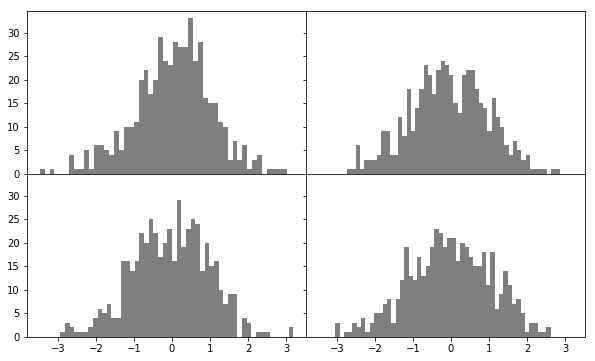

In [24]:
# 将 间距收缩至 0
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
# wspace 和 hspace 用于 控制宽度 和 高度的百分比，可以 用作 subplot之间的间距
plt.subplots_adjust(wspace=0, hspace=0)

Text(0.5,1,'My first matplotlib plot')

Text(0.5,0,'Stages')

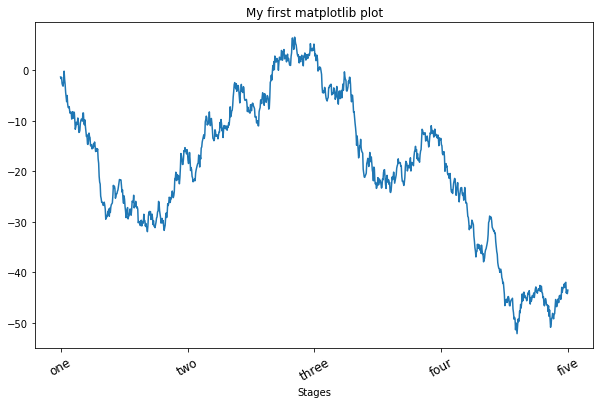

In [56]:
# 设置 标题、轴标签、刻度以及刻度标签
# 创建 一个简单的图像，并绘制一段随机漫步
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
# 设置 刻度的位置,默认情况下，这些位置 就是刻度标签
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four', 'five'],
                           rotation=30, fontsize='large')
ax.set_title('My first matplotlib plot') # 设置 标题
ax.set_xlabel('Stages') # 为 X轴 设置一个名称

Text(0.5,1,'legend example')

Text(0.5,0,'Stage')

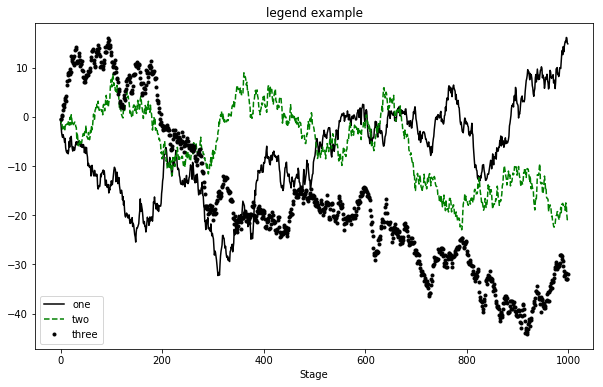

In [66]:
# 添加 图例（legend）-标识 图标元素的重要工具
# 添加方式1：添加 subplot的时候传入 label 参数；
# 添加方式2：
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.set_title('legend example')
ax.set_xlabel('Stage')
# 1.调用 ax.legend()或 plt.legend() 来 自动创建图例
ax.legend(loc='best')  # loc 指明 将图例放在哪里

### 注解以及在subplot上绘图

TypeError: must be real number, not datetime.datetime

TypeError: must be real number, not datetime.datetime

TypeError: must be real number, not datetime.datetime

(732677.0, 734138.0)

(600, 1800)

Text(0.5,1,'Import dates in 2008`2009 financial crisis')

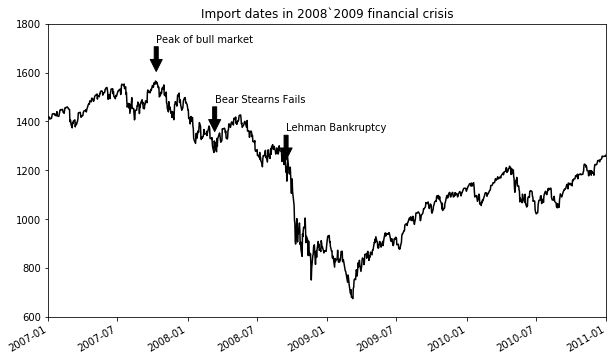

In [81]:
# 绘制一些自定义的 注解（文本、箭头或者其他图形）
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1,1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisic_data=[
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisic_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
               xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
               horizontalalignment='left', verticalalignment='top')
    
# 放大 到 2007~2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title("Import dates in 2008~2009 financial crisis")

### 将图表保存到文件
利用 plt.savefig方法 可以将 **当前**图表 保存到文件，该方法相当于 Figure对象的实例方法 savefig

In [82]:
# 将 当前 图表 保存为SVG文件(文件类型 是通过 文件拓展名 推断出来的)
plt.savefig('../figpath.svg')

<Figure size 720x432 with 0 Axes>

In [83]:
# 发布图片时，最常用到的 两个选项：
# dip：控制 “每英寸点数”分辨率
# bbox_inches:可以剪除 当前图标周围的空白部分
# 例子：得到 一张 带有 最小白边 且分辨率 为400 DPI的PNG图像
plt.savefig('../figpath.png', dpi=400, bbox_inches='tight')

<Figure size 720x432 with 0 Axes>

In [84]:
# savefig 并非一定 要写入 磁盘，也可写入任何  文件 型 的对象，比如 StringIo
from io import StringIO
buffer = StringIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

TypeError: string argument expected, got 'bytes'

<Figure size 720x432 with 0 Axes>

## Hierarchical Indexing

In [ ]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

In [ ]:
data.index

In [ ]:
data['b']
data['b':'c']
data.loc[['b', 'd']]

In [ ]:
data.loc[:, 2]

In [ ]:
data.unstack()

In [ ]:
data.unstack().stack()

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame['Ohio']

MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                       names=['state', 'color'])

### Reordering and Sorting Levels

In [ ]:
frame.swaplevel('key1', 'key2')

In [ ]:
frame.sort_index(level=1)
frame.swaplevel(0, 1).sort_index(level=0)

### Summary Statistics by Level

In [ ]:
frame.sum(level='key2')
frame.sum(level='color', axis=1)

### Indexing with a DataFrame's columns

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

In [ ]:
frame.set_index(['c', 'd'], drop=False)

In [ ]:
frame2.reset_index()

## Combining and Merging Datasets

### Database-Style DataFrame Joins

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1
df2

In [ ]:
pd.merge(df1, df2)

In [ ]:
pd.merge(df1, df2, on='key')

In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

In [ ]:
pd.merge(df1, df2, how='outer')

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1
df2
pd.merge(df1, df2, on='key', how='left')

In [ ]:
pd.merge(df1, df2, how='inner')

In [ ]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

In [ ]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

### Merging on Index

In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
left1
right1
pd.merge(left1, right1, left_on='key', right_index=True)

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

In [ ]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
lefth
righth

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
left2
right2
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
left2.join(right2, how='outer')

In [ ]:
left1.join(right1, on='key')

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
another
left2.join([right2, another])
left2.join([right2, another], how='outer')

### Concatenating Along an Axis

In [ ]:
arr = np.arange(12).reshape((3, 4))
arr
np.concatenate([arr, arr], axis=1)

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
pd.concat([s1, s2, s3])

In [ ]:
pd.concat([s1, s2, s3], axis=1)

In [ ]:
s4 = pd.concat([s1, s3])
s4
pd.concat([s1, s4], axis=1)
pd.concat([s1, s4], axis=1, join='inner')

In [ ]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
result
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
df1
df2
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

In [ ]:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
df1
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True)

### Combining Data with Overlap

In [ ]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
a
b
np.where(pd.isnull(a), b, a)

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
df1
df2
df1.combine_first(df2)

## Reshaping and Pivoting

### Reshaping with Hierarchical Indexing

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)
result.unstack('state')

In [ ]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2
data2.unstack()

In [ ]:
data2.unstack()
data2.unstack().stack()
data2.unstack().stack(dropna=False)

In [ ]:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
df
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### Pivoting “Long” to “Wide” Format

In [ ]:
data = pd.read_csv('examples/macrodata.csv')
data.head()
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D', 'end')
ldata = data.stack().reset_index().rename(columns={0: 'value'})

In [ ]:
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

### Pivoting “Wide” to “Long” Format

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

In [ ]:
melted = pd.melt(df, ['key'])
melted

In [ ]:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

In [ ]:
reshaped.reset_index()

In [ ]:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

In [ ]:
pd.melt(df, value_vars=['A', 'B', 'C'])
pd.melt(df, value_vars=['key', 'A', 'B'])

## Conclusion